In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

In [3]:
make_class = make_classification(n_samples=500,
                                n_features=3,
                                n_redundant=0,
                                n_informative=2,
                                n_classes=3,
                                n_clusters_per_class=1,
                                random_state=1)

data = pd.DataFrame(make_class[0], columns=range(make_class[0].shape[1]))
data['target'] = make_class[1]
data.head()

,0,1,2,target
0,-0.171870,-0.843911,0.111383,1
1,-1.605341,-1.325491,-0.765777,2
2,-0.995140,0.186075,-0.962897,2
3,0.876133,0.101203,-1.116981,1
4,0.947067,0.569125,1.311654,0


In [13]:
kfold = KFold(n_splits=3, random_state=15, shuffle=True)
splits = kfold.split(data, data['target'])
print('타겟 데이터 비율:', data['target'].value_counts() / len(data))
for n, (train_index, test_index) in enumerate(splits):
    if n==2:
        print(f'{n*1} 번째 fold 학습 데이터: {np.round(len(train_index) / (len(train_index) + len(test_index)),2)}'+
                   f'\t테스트 데이터 비율: {np.round(len(test_index) / (len(train_index) + len(test_index)),2)}\n테스트 데이터에 있는 타겟 비율\n' +
                   f'{data.iloc[test_index,3].value_counts() / len(data.iloc[test_index,3])}\n테스트 데이터에 있는 타겟 비율\n'
                   f'{data.iloc[train_index,3].value_counts() / len(data.iloc[train_index,3])}\n\n')

타겟 데이터 비율: 0    0.338
2    0.334
1    0.328
Name: target, dtype: float64
2 번째 fold 학습 데이터: 0.67	테스트 데이터 비율: 0.33
테스트 데이터에 있는 타겟 비율
1    0.343373
2    0.343373
0    0.313253
Name: target, dtype: float64
테스트 데이터에 있는 타겟 비율
0    0.350299
2    0.329341
1    0.320359
Name: target, dtype: float64




In [14]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)
splits = kfold.split(data, data['target'])
print(f'타겟 데이터 비율\n{data["target"].value_counts() / len(data)}\n\n')

for n, (train_index, test_index) in enumerate(splits):
    if n==2: print(f'{n*1} 번째 fold 학습 데이터: {np.round(len(train_index) / (len(train_index) + len(test_index)),2)}'+
                   f'\t테스트 데이터 비율: {np.round(len(test_index) / (len(train_index) + len(test_index)),2)}\n테스트 데이터에 있는 타겟 비율\n' +
                   f'{data.iloc[test_index,3].value_counts() / len(data.iloc[test_index,3])}\n테스트 데이터에 있는 타겟 비율\n'
                   f'{data.iloc[train_index,3].value_counts() / len(data.iloc[train_index,3])}\n\n')

타겟 데이터 비율
0    0.338
2    0.334
1    0.328
Name: target, dtype: float64


2 번째 fold 학습 데이터: 0.67	테스트 데이터 비율: 0.33
테스트 데이터에 있는 타겟 비율
0    0.337349
2    0.337349
1    0.325301
Name: target, dtype: float64
테스트 데이터에 있는 타겟 비율
0    0.338323
2    0.332335
1    0.329341
Name: target, dtype: float64




In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt = DecisionTreeClassifier(random_state=42)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt, data,label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores,2))
print('평균 검증 정확도:', np.round(np.mean(scores),2))

교차 검증별 정확도: [0.98 0.94 0.96]
평균 검증 정확도: 0.96


In [16]:
import sklearn.datasets as data

x= data.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns=x.feature_names)
cancer['target'] = x.target

In [17]:
X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=100)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=10)

parameters = {'max_depth':[3,5,7],
             'min_samples_split':[3,5]}

grid_dt = GridSearchCV(dt_clf,
                      param_grid = parameters,
                      cv=5,
                      refit=True)

grid_dt.fit(X_train, y_train)

grid_dt.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [19]:
result = pd.DataFrame(grid_dt.cv_results_)
result[['params', 'mean_test_score','rank_test_score', 'split0_test_score',
       'split1_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
0,"{'max_depth': 3, 'min_samples_split': 3}",0.922025,1,0.9500,0.9375
1,"{'max_depth': 3, 'min_samples_split': 5}",0.922025,1,0.9500,0.9375
2,"{'max_depth': 5, 'min_samples_split': 3}",0.914462,3,0.9250,0.9250
3,"{'max_depth': 5, 'min_samples_split': 5}",0.909430,4,0.9250,0.9375
4,"{'max_depth': 7, 'min_samples_split': 3}",0.904462,6,0.8875,0.9250
5,"{'max_depth': 7, 'min_samples_split': 5}",0.906930,5,0.9000,0.9375


In [20]:
estimator = grid_dt.best_estimator_
pred = estimator.predict(X_test)

from sklearn.metrics import accuracy_score
print('테스트 셋 정확도:', accuracy_score(y_test, pred))

테스트 셋 정확도: 0.9473684210526315


In [21]:
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms

In [24]:
x=data.load_breast_cancer()
cancer = pd.DataFrame(data=x.data, columns= x.feature_names)
cancer['target'] = x.target

X = cancer.iloc[:,:-1]
y = cancer.iloc[:,-1]

X_train, X_test, y_train, y_test = ms.train_test_split(X,y,
                                                      test_size=0.3,
                                                      random_state=100)
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

max_depths = range(1,5,1)
min_samples_split = range(2,12,1)
min_samples_leaf = range(1,100,2)
param_grid = {
    'max_depth': max_depths,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf}

In [27]:
import time
start = time.time()
random_dtc = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, random_state=1, n_iter=100, cv=5, n_jobs=-1)
random_dtc.fit(X_train_std, y_train)
print('lt takes %s minutes' %((time.time()-start)/60))
print('랜덤 서치를 통해서 찾은 최적 하이퍼 파라미터 조합:\n', random_dtc.best_params_)

lt takes 0.010099240144093831 minutes
랜덤 서치를 통해서 찾은 최적 하이퍼 파라미터 조합:
 {'min_samples_split': 5, 'min_samples_leaf': 11, 'max_depth': 3}


## 실습

In [28]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [43]:
data = pd.read_csv('penguins.txt')

In [30]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [32]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [44]:
col_m = ['bill_depth_mm', 'bill_length_mm','flipper_length_mm','body_mass_g']
for column in col_m:
    data[column].fillna(data[column].median(), inplace=True)

In [45]:
data['sex'] = data['sex'].fillna('MALE')

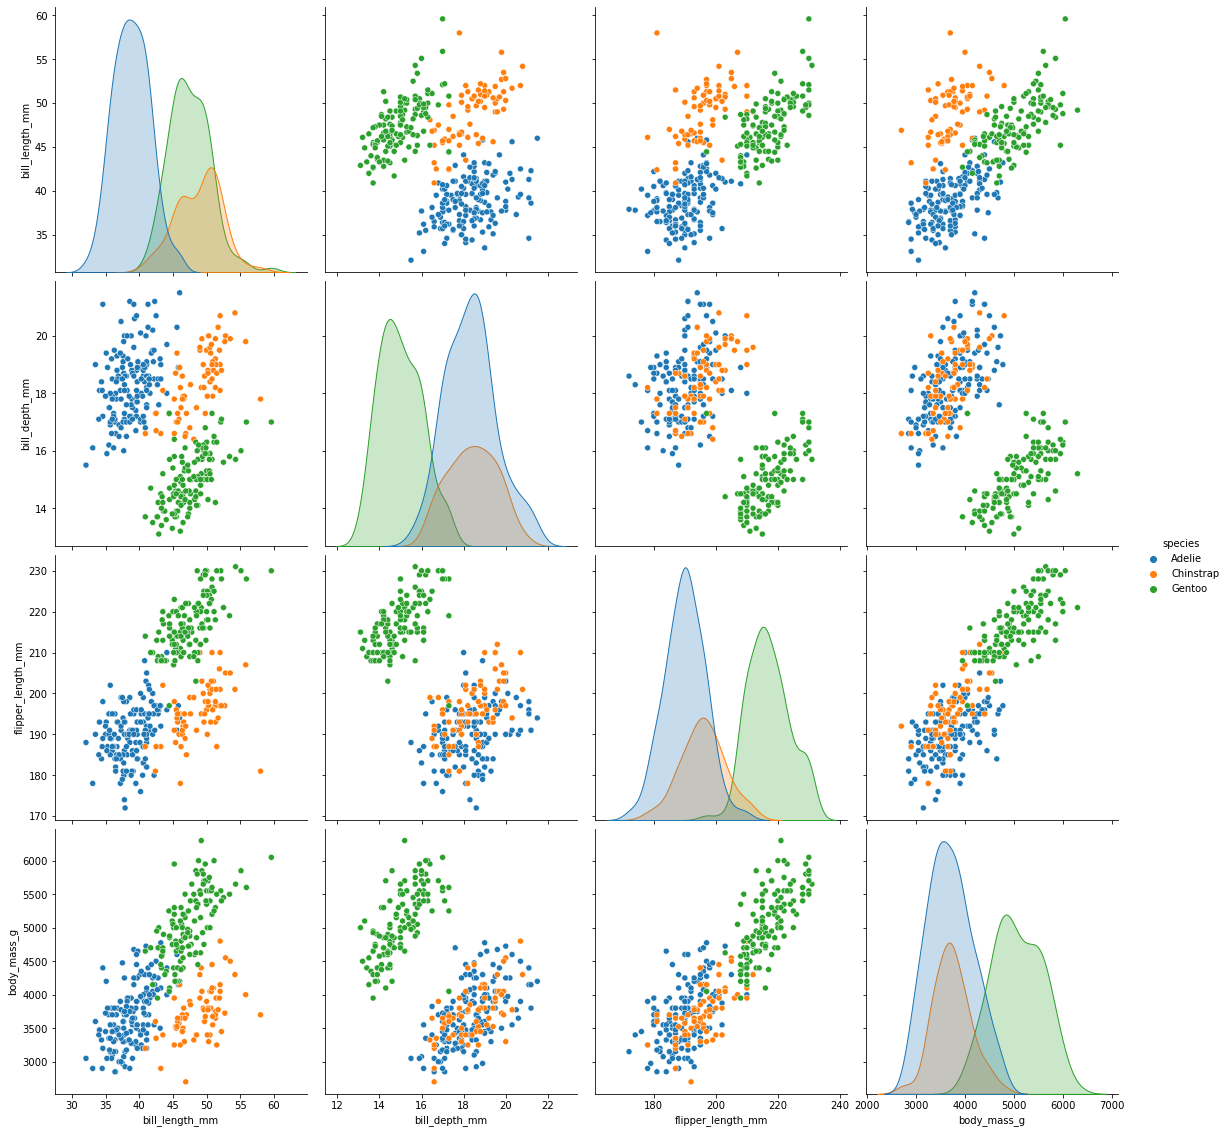

In [35]:
sns.pairplot(data, hue="species", height=4)
plt.show()

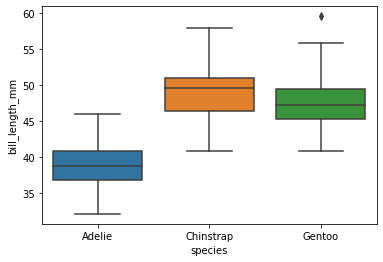

In [36]:
sns.boxplot(x= 'species', y='bill_length_mm', data=data)
plt.show()

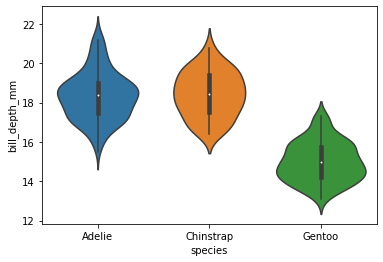

In [37]:
sns.violinplot(x='species', y='bill_depth_mm', data=data)
plt.show()

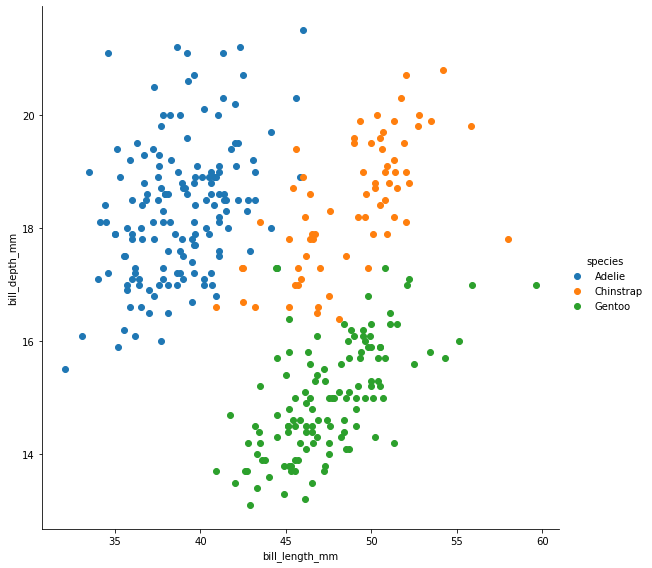

In [38]:
sns.FacetGrid(data, hue="species", height=8)\
.map(plt.scatter, "bill_length_mm", "bill_depth_mm")\
.add_legend()

In [46]:
y = data['species']
x= data.drop('species', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [47]:
print(x_train.shape)
print(y_train.shape)

(240, 6)
(240,)


In [52]:
le = LabelEncoder()
x_train['island'] = le.fit_transform(x_train['island'])
x_train['sex']= le.fit_transform(x_train['sex'])
x_test['island'] = le.fit_transform(x_test['island'])
x_test['sex']= le.fit_transform(x_test['sex'])

<ipython-input-52-07ad4f4b9845>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['island'] = le.fit_transform(x_train['island'])
<ipython-input-52-07ad4f4b9845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['sex']= le.fit_transform(x_train['sex'])
<ipython-input-52-07ad4f4b9845>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [53]:
sc = StandardScaler()
sc.fit(x_train)
sc.fit(x_test)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [54]:
svc = SVC(random_state=10)
param_grid = {'C':[0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001]}

In [55]:
import time
start = time.time()
grid_search = GridSearchCV(svc, param_grid,refit=True)
grid_search.fit(x_train, y_train)
print('it takes %s minutes' % ((time.time()-start)/60))

it takes 0.005980594952901205 minutes


In [56]:
print(grid_search.best_estimator_)

SVC(C=1, gamma=0.1, random_state=10)


In [59]:
grid_predictions = grid_search.predict(x_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test,grid_predictions))

[[42  0  0]
 [ 0 24  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        42
   Chinstrap       1.00      1.00      1.00        24
      Gentoo       1.00      1.00      1.00        38

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [60]:
rand_list = {"C": stats.uniform(2,13),
            "gamma": stats.uniform(0.1,1)}

In [61]:
import time
start = time.time()
rand_search = RandomizedSearchCV(svc, param_distributions=rand_list,
                                n_iter =20, n_jobs=4, cv=3, random_state=10,
                                scoring='accuracy')
rand_search.fit(x_train, y_train)
print('it takes %s minutes'% ((time.time()-start)/60))

it takes 0.05013422171274821 minutes


In [62]:
rand_predictions = rand_search.predict(x_test)
print(confusion_matrix(y_test,rand_predictions))
print(classification_report(y_test, rand_predictions))

[[41  1  0]
 [ 0 24  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        42
   Chinstrap       0.96      1.00      0.98        24
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## 실습 예제 2

In [63]:
iris = load_iris()

In [64]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
y = pd.Series(iris.target, dtype='category')
y = y.cat.rename_categories(iris.target_names)
df['species']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


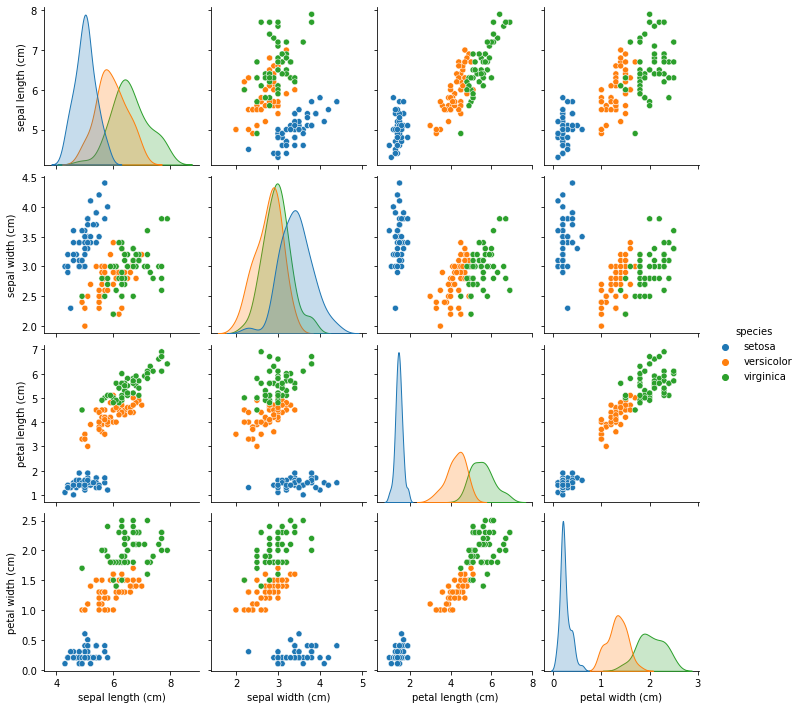

In [65]:
sns.pairplot(df, hue='species')
plt.show()

C:\Users\whssk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\whssk\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\whssk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\whssk\anaconda3\lib\site-packages\seaborn\distr

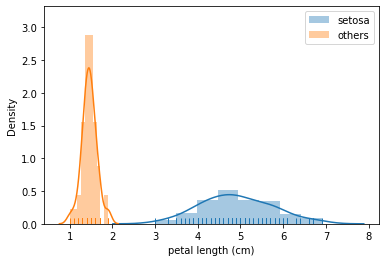

In [66]:
sns.distplot(df[df.species != 'setosa']['petal length (cm)'], hist=True, rug=True, label='setosa')
sns.distplot(df[df.species == 'setosa']['petal length (cm)'], hist=True, rug=True, label='others')
plt.legend()
plt.show()

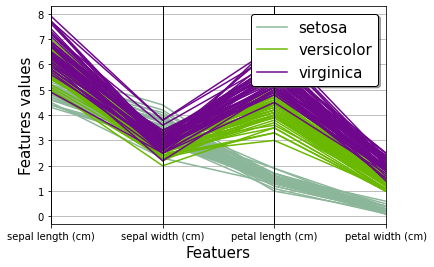

In [68]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'species')
plt.xlabel('Featuers',fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.show()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

In [70]:
ss= StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
print(X_train.mean())
print(X_train.var())
X_test = ss.transform(X_test)

sepal length (cm)    1.713444e-15
sepal width (cm)    -1.665797e-15
petal length (cm)   -2.238950e-16
petal width (cm)    -5.736152e-17
dtype: float64
sepal length (cm)    1.008403
sepal width (cm)     1.008403
petal length (cm)    1.008403
petal width (cm)     1.008403
dtype: float64


In [71]:
def print_metrics(model, feature, target):
    scores= cross_val_score(model, feature, target, cv=5)
    print('cross val score:', scores)
    print('mean accuracy:', scores.mean())

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
print_metrics(dt,X_train, y_train)

cross val score: [0.95833333 1.         0.875      0.95833333 0.95833333]
mean accuracy: 0.95


In [73]:
params = {'min_impurity_decrease': np.arange(0.0001,0.001,0.0001),
         'max_depth':range(2,5,1),
         'min_samples_split':range(1,100,5)}

In [74]:
import time
start = time.time()
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params, n_jobs=-1)
dt_gs.fit(X_train,y_train)
dt_gd_pred = dt_gs.predict(X_test)

print(dt_gs.best_params_)
print('그리드 서치(학습):{0:.4f}'.format(dt_gs.best_score_))
print('그리드 서치(테스트):{0:.4f}'.format(accuracy_score(y_test,dt_gd_pred)))
print('lt takes %s minutes'%((time.time()-start)/60))


{'max_depth': 3, 'min_impurity_decrease': 0.0001, 'min_samples_split': 31}
그리드 서치(학습):0.9500
그리드 서치(테스트):1.0000
lt takes 0.13262672821680704 minutes


C:\Users\whssk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
 0.91666667 0.675      0.675      0.675      0.675      0.675
 0.675      0.675             nan 0.91666667 0.91666667 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
 0.91666667 0.91666667 0.91666667 0.675      0.675      0.675
 0.675      0.675      0.675      0.675             nan 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.675
 0.675      0.675      0.675      0.675      0.675      0.675
        nan 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667 0.91666667
 0.91666667 0.675      0.675      0.675      0.675      0.675
 0.675     

In [78]:
# 랜덤 서치
from scipy.stats import uniform, randint

params = {'min_impurity_decrease': uniform(0.0001,0.001),
         'max_depth':randint(1,6),
         'min_samples_split':randint(1,100)}

import time
start = time.time()
dt_rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params,n_iter=300, n_jobs=-1, random_state=42)
dt_rs.fit(X_train,y_train)
dt_rd_pred = dt_rs.predict(X_test)

print(dt_rs.best_params_)
print('그리드 서치(학습):{0:.4f}'.format(dt_rs.best_score_))
print('그리드 서치(테스트):{0:.4f}'.format(accuracy_score(y_test,dt_gr_pred)))
print('lt takes %s minutes'%((time.time()-start)/60))

{'max_depth': 4, 'min_impurity_decrease': 0.00103855270901575, 'min_samples_split': 2}
그리드 서치(학습):0.9500


C:\Users\whssk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.675      0.675      0.94166667 0.94166667 0.95       0.675
 0.675      0.675      0.94166667 0.91666667 0.675      0.94166667
 0.94166667 0.675      0.675      0.94166667 0.925      0.91666667
 0.675      0.91666667 0.91666667 0.91666667 0.675      0.675
 0.91666667 0.675      0.675      0.675      0.94166667 0.94166667
 0.91666667 0.675      0.91666667 0.675      0.33333333 0.93333333
 0.675      0.94166667 0.675      0.91666667 0.675      0.94166667
 0.94166667 0.94166667 0.91666667 0.675      0.675      0.675
 0.33333333 0.675      0.675      0.91666667 0.675      0.675
 0.675      0.675      0.91666667 0.675      0.675             nan
 0.91666667 0.675      0.91666667 0.91666667 0.675      0.94166667
 0.675      0.91666667 0.675      0.675      0.91666667 0.91666667
 0.91666667 0.91666667 0.91666667 0.675      0.95       0.33333333
 0.941

NameError: name 'dt_gr_pred' is not defined

In [79]:
# 베이지안 최적화
!pip install scikit-optimize

In [82]:
space = {'max_depth':np.arange(1,6,1),
         'min_impurity_decrease': np.arange(0.00005,0.002, 0.0001),
         'min_samples_split':np.arange(1,100,2)}

from skopt import BayesSearchCV
b0 = BayesSearchCV(DecisionTreeClassifier(random_state=42),
                  search_spaces=space,
                  n_jobs=1,
                  cv=5,
                  n_iter=20,
                  scoring='accuracy',
                  verbose=0,
                  random_state=42)

In [83]:
b0.fit(X_train,y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
              n_iter=20, random_state=42, scoring='accuracy',
              search_spaces={'max_depth': array([1, 2, 3, 4, 5]),
                             'min_impurity_decrease': array([5.00e-05, 1.50e-04, 2.50e-04, 3.50e-04, 4.50e-04, 5.50e-04,
       6.50e-04, 7.50e-04, 8.50e-04, 9.50e-04, 1.05e-03, 1.15e-03,
       1.25e-03, 1.35e-03, 1.45e-03, 1.55e-03, 1.65e-03, 1.75e-03,
       1.85e-03, 1.95e-03]),
                             'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])})

In [85]:
print('베이지안 최적화 정확도(학습):', b0.best_estimator_)
print(b0.best_params_)
dt_b0_pred = b0.predict(X_test)
print('베이지안 최적화 정확도(테스트):', accuracy_score(y_test, dt_b0_pred))

베이지안 최적화 정확도(학습): DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.0017500000000000003,
                       min_samples_split=31, random_state=42)
OrderedDict([('max_depth', 4), ('min_impurity_decrease', 0.0017500000000000003), ('min_samples_split', 31)])
베이지안 최적화 정확도(테스트): 1.0
